# TP: Méthode de Monte-Carlo

Auteur: Noé Blassel

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1) Aiguille de Buffon 

On implémente une méthode de Monte-Carlo pour estimer $\pi$ à l'aide d'aiguilles jetées aléatoirement sur un parquet: c'est l'expérience de Buffon, datée de $1733$.
On simule $n$ lancers d'aiguilles de longueur $\ell$ sur un parquet avec des rainures espacées de $L$ unités.

On note $0 \leq n_c \leq n$ le nombre d'aiguilles qui croisent les rainures du parquet (celles colorées en rouge dans la cellule ci-dessous). On montre alors à l'aide de la loi forte des grands nombres que :

$$\frac{n_c}{n} \underset{n\to\infty}{\overset{\text{p.s.}}{\longrightarrow}} \frac{2\ell}{L\pi}.$$

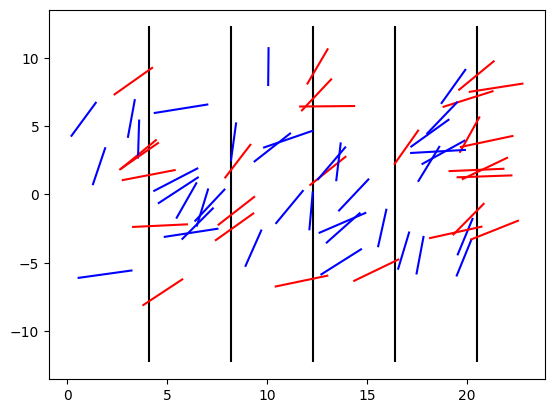

In [6]:
N_plt = 64

l = 2.7 # longueur de l'aiguille
L = 4.1 # largeur des lattes du parquet

plt.vlines([L,2*L,3*L,4*L,5*L],ymin = -3*L, ymax=3*L,color="black")

for i in range(N_plt):
    X = np.random.uniform(0,5*L)
    Y = np.random.uniform(-2*L,2*L)
    
    theta = np.random.uniform(0,np.pi/2)
    
    c = "red" if (np.mod(X,L) + l*np.cos(theta)) > L else "blue"
    
    plt.plot([X,X+l*np.cos(theta)],[Y,Y+l*np.sin(theta)],color = c)
plt.show()

Le TCL fournit des intervalles de confiance asymptotiques. En notant 
$$ \sigma_n = \sqrt{\frac{n_c}{n}\left(1-\frac{n_c}{n}\right)},$$
on montre que
$$ \mathbb P \left( \pi \in \left] \frac{2\ell}{L(\frac{n_c}{n} + 1.96\frac{\sigma_n}{\sqrt n})},\frac{2\ell}{L(\frac{n_c}{n} - 1.96\frac{\sigma_n}{\sqrt n})}\right[\right) \overset{n\to\infty}{\longrightarrow} 0.95 $$

La valeur $1.96$ est bien sûr approximative.

In [7]:
N = 100 # multiplier par 100 pour gagner un chiffre significatif: c'est le sens de la convergence en 1/sqrt(n)

X = np.random.uniform(0,L,N) # abssices modulo L
theta = np.random.uniform(0,np.pi/2,N) # angles avec l'horizontale

alpha = 1.96

p_hat = np.mean((X + l*np.cos(theta)) > L)# probabilité empirique de croiser une latte -> 2l/(pi*L)
sigma_hat = np.sqrt(p_hat * (1 - p_hat)) # ecart-type pour une variable de Bernoulli



low = (2*l/L)/(p_hat+alpha*sigma_hat/np.sqrt(N))
high = (2*l/L)/(p_hat-alpha*sigma_hat/np.sqrt(N))

print(f"Estimation de pi: {2*l/(L*p_hat)}")
print(f"IC(0.95) pour pi: ]{low:.03f},{high:.03f}[, largeur de l'intervalle = {(high-low) : .04f}")


Estimation de pi: 3.2123735871505064
IC(0.95) pour pi: ]2.601,4.200[, largeur de l'intervalle =  1.5990


## 2) Pricing d'un produit financier

On cherche a déterminer le juste prix d'un certain produit financier. La règle fixée par la banque est la suivante: un an après l'achat, l'acheteur récupère, en euros par unité de produit acheté, la performance (c'est-à-dire le rapport entre le prix final et le prix initial) de l'action la plus performante du CAC40 (celle dont le prix a le plus augmenté, ou le moins diminué), sauf si cette performance est supérieure à 110%, auquel cas le retour est fixé à 1.10€ par unité achetée.

On suppose qu'un acheteur a acquis une unité de ce produit. Alors on a par exemple que:
- Si le prix de l'action du CAC40 la plus performante s'est multipliée par $1.05$ en un an, et que l'acheteur a acheté une unité de ce produit, la banque verse $1.05€$ à l'acheteur au bout d'un an.
- Si l'action la plus performante a vu son prix être multiplié par $1.2$, la banque verse en revanche seulement $1.10€$ à l'acheteur.
- Si, par contre, tous les prix du CAC40 chutent, et par exemple que le prix de l'action la plus performante s'est s'est vu multiplié par $0.9$ en un an, alors la banque verse $0.90€$ à l'acheteur. 

L'intérêt potentiel d'investir dans ce type de produit plutôt que dans une action en particulier est que la probabilité d'une mauvaise performance généralisée est bien plus faible que celle de la mauvaise performance d'une action spécifique: le risque d'une perte importante est donc limité. En revanche, le retour maximal par unité de produit est de $1.10€$.

La performance des cours du CAC40 au bout d'un an est modélisé par le vecteur aléatoire:

$$S_i = \mathrm{exp}\left(-\frac{\sigma^2}2+\sigma W_i\right),\,i=1,\dots,40,$$ 
et où $W$ est un vecteur Gaussien corrélé:
    $$ W \sim \mathcal N(0,(1-\rho)\mathrm{I}_{40}+\rho \mathrm{J}_{40}),$$
où $\mathrm{I}_{40},\mathrm{J}_{40}$ sont respectivement les matrices identité et la matrice à coefficients constants égaux à 1, de dimensions $40\times 40$. Les nombres $\sigma >0$ et $0\leq \rho\leq 1$ sont respectivement des paramètres de volatilité et de corrélation entre les actifs.

Dans la cellule ci-dessous, on visualise la croissance des prix du CAC40 sur un an. Il n'est pas nécessaire de comprendre en détail les formules ci-dessous: on peut se contenter de savoir qu'elles sont consistantes avec la formule donnée plus haut pour le vecteur $S$ des performances au bout d'un an. Pour les plus curieux, le modèle, communément utilisé, est un mouvement Brownien géométrique corrélé.

On peut jouer avec les paramètres $\rho$ et $\sigma$ pour avoir une intuition de leur influence sur le comportement du modèle.

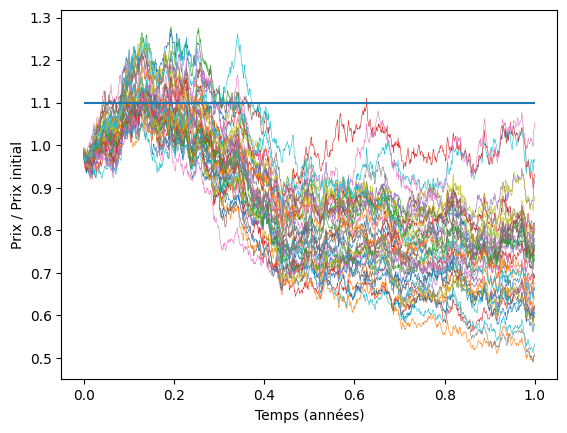

Rémunération: 1.0536756878645412


In [27]:
N_cours = 40 # nombre d'actions dans le CAC40
sig = 0.3# volatilité
rho = 0.7 # corrélation entre les actions -- jouer avec ce paramètre pour voir l'effet 

C = (1-rho)*np.eye(N_cours) + rho*np.ones((N_cours,N_cours)) # matrice de covariance
L = np.linalg.cholesky(C) # facteur de Cholesky

dt = 1e-3
T = 1
n_steps = int(T/dt)

Z = np.random.randn(N_cours,n_steps)
prices = np.cumprod(np.exp(-sig**2*dt/2+np.sqrt(dt)*sig*L@Z),axis=1) # évolution des cours sur un an
trange = np.linspace(0,1,n_steps)

plt.plot(trange,prices.T,linewidth=0.4)
plt.hlines([1.1],xmin=0,xmax=1)

plt.xlabel("Temps (années)")
plt.ylabel("Prix / Prix initial")
plt.show()

print(f"Rémunération: {min(1.1,np.max(prices[:,-1]))}")

Le problème posé est celui de déterminer le prix théorique à payer pour une unité de ce produit. On admet que celui-ci est donné par la rémunération moyenne par unité de produit acheté, à savoir
$$ P =\mathbb{E}[\min(\max(S),1.1)].$$

On peut utiliser une méthode de Monte-Carlo pour obtenir une estimation de $P$ et un intervalle de confiance, comme dans la cellule ci-dessous.

On utilise l'égalité en loi (à prouver!):
$$W \overset{\mathcal{L}}{=}\sqrt\rho G_1 + \sqrt{1-\rho}G_{40},\quad G_1 \sim \mathcal N(0,1),\,G_{40}\sim\mathcal N(0,\mathrm{I}_{40}),\, G_1 \perp G_{40}.$$

In [529]:
N = 10000 # nombre d'échantillons

G = np.random.randn(N,N_cours) # NxN_cours
H = np .random.randn(N,1) # Nx1

W = np.sqrt(1-rho) * G + np.sqrt(rho)*H # NxN_cours 

S = np.exp(-sig**2/2 + sig*W) # ratios au bout d'un an, selon notre modèle | NxN_cours 
P = np.max(S,axis=1) # N

P[P>1.1] = 1.1


esp = P.sum()/N # moyenne empirique
var = np.sum(P**2)/N - esp**2 # variance empirique
std = np.sqrt(var)

print(f"Estimation du prix théorique: {esp}")
print(f"IC(0.95): ]{esp-1.96*std/np.sqrt(N)},{esp+1.96*std/np.sqrt(N)}[")

Estimation du prix théorique: 1.0020514317667075
IC(0.95): ]1.0018538518161748,1.0022490117172402[


Jouer avec la volatilité $\sigma$ et le taux de corrélation $\rho$ pour mesurer l'impact sur le prix théorique.

## 3) Réduction de variance par échantillonage d'importance: estimation de la probabilité d'un évènement rare

On veut calculer, pour $X\sim \mathcal N(0,1)$, et un $\alpha>0$ fixé, la probabilité:

$$\pi_{\alpha}=\mathbb{P}(X > \alpha)$$
en utilisant une méthode de Monte-Carlo.

L'estimateur naïf est donné par:
$$ \pi_{n,\alpha} = \frac1n \sum_{i=0}^{n-1} 1_{X_i > \alpha}.$$
Si $\alpha$ est grand, il faut prendre $n$ très grand pour pouvoir espérer observer un évènement $X_i > \alpha$.
En pratique, cela signifie qu'il est très difficile d'obtenir une estimation de $\pi_{\alpha}$ avec une méthode de Monte-Carlo classique, 

Pour  se propose de considérer une méthode par échantillonage d'importance, avec $q$ la densité d'une loi normale $\mathcal N(\alpha,1)$.

On note $p$ la densité d'une loi $\mathcal N(0,1)$. Le rapport $p/q$ s'écrit donc:
$$ \frac{p(x)}{q(x)} = \frac{\sqrt{2\pi}}{\sqrt{2\pi}}\mathrm{exp}\left(-\frac{x^2}2+\frac{(x-\alpha)^2}2\right)=\mathrm{exp}\left(\frac{\alpha^2}2 - \alpha x\right).$$
Dans la cellule suivante on représente les différentes fonctions en jeu:

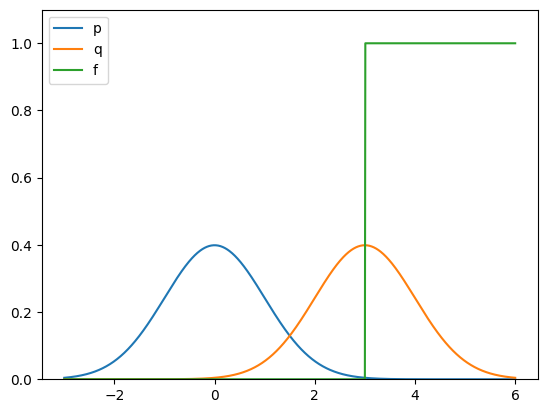

In [496]:
alpha = 3

X = np.linspace(-3,alpha+3,1000)
p = np.exp(-X**2/2)/np.sqrt(2*np.pi)
q = np.exp(-(X-alpha)**2/2)/np.sqrt(2*np.pi)
f = X > alpha

plt.plot(X,p,label="p")
plt.plot(X,q,label="q")
plt.plot(X,f,label="f")
plt.ylim(0,1.1)
plt.legend(loc="best")

L'estimateur modifié est donc:

$$ \widetilde \pi_{n,\alpha} = \frac{1}{n}\sum_{i=0}^{n-1}\mathrm{exp}\left(\frac{\alpha^2}2-Y_i\alpha\right)1_{Y_i>\alpha},$$
où les $Y_i$ sont <i>iid</i> de loi $\mathcal N(\alpha,1)$. Comme $Y_i \sim X_i + \alpha$, on a aussi
$$ \widetilde \pi_{n,\alpha} \sim \frac1n\sum_{i=0}^{n-1}\mathrm{exp}\left(\frac{\alpha^2}2 - (X_i+\alpha)\alpha\right)1_{X_i > 0}.$$

Ci-dessous, on compare les <b>variances relatives</b> empiriques de ces deux estimateurs en fonction de $n$:
il s'agit des rapport:
$$\frac{\pi_{n,\alpha}(1-\pi_{n,\alpha})}{\pi_{n,\alpha}},\qquad \frac{\widetilde V_{n,\alpha}}{\widetilde \pi_{n,\alpha}},$$
où 
$$ \widetilde V_{n,\alpha} = \frac1n\sum_{i=0}^{n-1}\left[\mathrm{exp}\left(\frac{\alpha^2}2-Y_i\alpha\right)1_{Y_i>\alpha}\right]^2 - \widetilde \pi_{n,\alpha}^2$$
est la variance empirique de $\mathrm{exp}\left(\frac{\alpha^2}2-Y_0\alpha\right)1_{Y_0>\alpha}$.
Lorsqu'ils sont définis, ces rapports quantifient notre incertitude relative sur le résultat renvoyé par chacun des estimateurs. Pour se convaincre de la pertinence de cette mesure, remarquons que si tous les $X_i$ sont inférieurs à $\alpha$ pour $i\leq n$, l'estimation qui en résulte $\pi_{n,\alpha} = 0$ n'a aucune utilité, malgré le fait que la variance empirique $\pi_{n,\alpha}(1-\pi_{n,\alpha})$ est nulle.

In [498]:
from scipy.special import erf # pour avoir acces à la fonction de répartition d'une gaussienne

N = 1000

X = np.random.randn(N)
Y = X + alpha

Z = np.exp(alpha**2/2 - Y*alpha) * (Y > alpha) # variables iid pour echantillonage d'importance

p = np.sum(X > alpha)/N
p_tilde = np.sum(Z)/N

p_ref = 0.5*(1-erf(alpha/np.sqrt(2))) # calcul de référence avec la fonction de répartition

var = p*(1-p)
var_tilde = np.sum(Z**2)/N - p_tilde**2


print(f"Estimation de p(alpha). Méthode classique: {p}. Échantillonage d'importance: {p_tilde}. Référence: {p_ref}")
print(f"Comparaison des variances relatives. Méthode classique: {var/p}. Échantillonage d'importance: {var_tilde/p_tilde}.")

Estimation de p(alpha). Méthode classique: 0.003. Échantillonage d'importance: 0.0014958116101924275. Référence: 0.0013498980316301035
Comparaison des variances relatives. Méthode classique: 0.997. Échantillonage d'importance: 0.0045764346143142.


Dans ce cas, la méthode d'échantillonage d'importance conduit à un gain de performance spectaculaire par rapport à la méthode classique.

## 4) Réduction de variance par variable de contrôle.

### A) Calculs directs
On considère la quantité:
$$I=\mathbb{E}\left[\frac1{(1-X)^\alpha}\right],$$

où $X \sim \beta(a,b)$, et où on a fixé $a>0$ et $b>2\alpha>0$. On rappelle que $X$ a pour densité de probabilité:

$$p(x) = x^{a-1}(1-x)^{b-1}\frac{1_{0<x<1}}{\beta(a,b)}.$$

on a $$\mathbb{E}\left[\frac1{(1-X)^{2\alpha}}\right] = \frac{1}{\beta(a,b)}\int_0^1 x^{a-1}(1-x)^{b-1}(1-x)^{-2\alpha}\,dx=\frac{\beta(a,b-2\alpha)}{\beta(a,b)}.$$

Comme on a supposé $b>2\alpha$, $(1-X)^{-\alpha}$ est de carré intégrable. (On rappelle que $\beta(a,b)$ est bien définie pour $a,b>0$).

Par un calcul similaire, on a directement:
$$I = \frac{\beta(a,b-\alpha)}{\beta(a,b)}.$$

On va calculer cette quantité en utilisant une méthode de Monte-Carlo, avec variable de contrôle.

<b> Remarque (et problème) pour les curieux: </b>
Dans le cas $\alpha \in \mathbb Z$, on peut calculer $I$ exactement.
Plus généralement, pour $k,l \in \mathbb Z$ tels que $ a+k >0, b+l >0$, on peut calculer explicitement les quantités:
$$ \mathbb E[X^k(1-X)^l],$$
en utilisant les identités $$\beta(a,b)=\frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)},\quad \Gamma(z+1)=z\Gamma(z).$$


On trouve, en particulier, avec $k=1,2$ et $l=0$:
$$ \mathbb E[X] = \frac{a}{a+b},\mathbb E[X^2] = \frac{a(a+1)}{(a+b)(a+b+1)},\,\mathrm{Var}(X)=\frac{ab}{(a+b)^2(a+b+1)}.$$

### B) Méthode de Monte-Carlo

On suppose qu'on sait simuler une loi $\beta(a,b)$ (voir le notebook simulation sinon), et on note 
$(X_i)_{i\geq 0}$ une suite de variables <i>iid</i> de même loi que $X$.

On note $f(x) = (1-x)^{-\alpha}$, et on suppose que $\mathbb E[g(X)] = 0$

Pour $h:[0,1]\to\mathbb R$ une fonction mesurable, on note
$$M_n(h)=\frac1n\sum_{i=0}^{n-1}h(X_i)$$
la moyenne empirique de $h(X)$ et
$$ V_n(h) = M_n(h^2)-M_n(h)^2$$
la variance empirique.

On introduit alors:
- L'estimateur de Monte-Carlo standard: $$ I_n = M_n(f),$$
- L'estimateur du multiplicateur optimal $\lambda^*$: $$ \lambda_n = \frac{M_n(fg)-M_n(f)M_n(g)}{V_n(g)},$$
- L'estimateur de la variance optimale associée à $\lambda^*$: $$ W_n = \frac{V_n(f)V_n(g)-\left(M_n(fg)-M_n(f)M_n(g)\right)^2}{V_n(g)}.$$

On montre alors que l'estimateur
$$\widetilde I_n = I_n - \lambda_n M_n(g)$$
converge presque sûrement vers $I$, et, en utilisant le théorème de Slutsky et le TCL bidimensionnel, qu'on a l'intervalle de confiance suivant:
$$\mathbb{P}\left(I\in \left]\widetilde I_n - 1.96\sqrt{\frac{W_n}{n}},\widetilde I_n + 1.96\sqrt{\frac{W_n}{n}}\right[\right) \overset{n\to\infty}{\longrightarrow}0.95.$$


Dans la cellule ci-dessous, on compare les estimateurs pour différents choix de $g$:
- Le choix $g_0=0$, qui correspond à l'estimateur de Monte-Carlo standard,
- Le choix $g_1(x) = \alpha(x-\frac{a}{a+b})$,
- Le choix $g_2(x) = g_1(x) + \frac{\alpha(\alpha+1)}{2}(x^2 - \frac{a(a+1)}{(a+b)(a+b+1)})$.

On a bien sûr à chaque fois $\mathbb E[g_i(X)] = 0$, et on peut continuer en prenant plus de termes dans la série de Taylor pour $f$ en $0$, quitte à calculer analytiquement plus de valeurs de $\mathbb E[X^n]$ pour $n\in \mathbb N$.

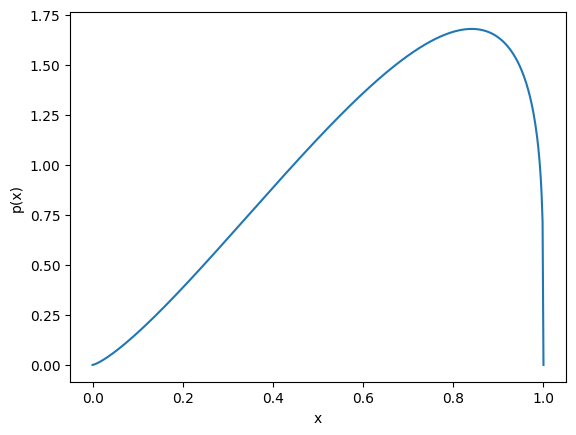

Valeur de référence: I = 1.1890532104682472.
Estimateur standard. Valeur: 1.1892921312757905 ± 0.0009326007678753403. Variance asymptotique: 0.022640154941734547.
Estimateur ordre 1. Valeur: 1.1890047206709535 ± 0.0005307324644815175. Variance asymptotique: 0.007332282092217441.
Estimateur ordre 2. Valeur: 1.18897932543968 ± 0.0004881049118309549. Variance asymptotique: 0.006201749400080808.


In [19]:
from scipy.special import beta


alpha = 0.123
a = 2.3
b = 1+2*alpha # on a bien b>2*alpha

pts = np.linspace(0,1,500)
P = (pts)**(a-1)*(1-pts)**(b-1)/beta(a,b) # densité beta(a,b)
plt.plot(pts,P)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

N = 100000
X = np.random.beta(a,b,N) # Echantillons
F = (1-X)**(-alpha) # Ce dont on veut l'espérance

print(f"Valeur de référence: I = {beta(a,b-alpha)/beta(a,b)}.")

I0 = np.mean(F) # moyenne MC standard
V0 = np.sum(F**2)/N - I0**2 # variance empirique standard
print(f"Estimateur standard. Valeur: {I0} ± {1.96*np.sqrt(V0/N)}. Variance asymptotique: {V0}.")

G1 = alpha*(X-a/(a+b)) # variable de contrôle (Taylor ordre 1)
VG1 = np.mean(G1**2)-np.mean(G1)**2 # variance empirique de G1
L1 = (np.mean(F*G1) - I0*np.mean(G1))/VG1 # lambda optimal associé
I1 = np.mean(F) - L1*np.mean(G1) # estimateur avec variable de contrôle
W1 = V0 - (np.mean(F*G1) - I0*np.mean(G1))**2/VG1# variance optimale associée
print(f"Estimateur ordre 1. Valeur: {I1} ± {1.96*np.sqrt(W1/N)}. Variance asymptotique: {W1}.")

G2 = G1 + 0.5*alpha*(alpha+1)*(X**2 - a*(a+1)/((a+b)*(a+b+1)))# variable de contrôle (Taylor ordre 2)
VG2 = np.mean(G2**2)-np.mean(G2)**2 # variance empirique de G2
L2 = (np.mean(F*G2) - I0*np.mean(G2))/VG2 # lambda optimal associé
I2 = np.mean(F) - L2*np.mean(G2) # estimateur avec variable de contrôle
W2 = V0 - (np.mean(F*G2) - I0*np.mean(G2))**2/VG2# variance optimale associée
print(f"Estimateur ordre 2. Valeur: {I2} ± {1.96*np.sqrt(W2/N)}. Variance asymptotique: {W2}.")
